In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics, preprocessing, neighbors

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (8,6)

**Importing the dataset**

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = janitor.clean_names(data)
df = janitor.remove_columns(df, ['user_id'])

df.head()

,gender,age,estimatedsalary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
df['gender'] = df.gender.map({'Male':0, 'Female':1})
df.head()

,gender,age,estimatedsalary,purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [5]:
X,y = df.drop(columns=['purchased']), df['purchased']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=27, train_size=0.8, shuffle=True)

X_train.shape, X_test.shape

((320, 3), (80, 3))

**Feature Scaling**

In [6]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [7]:
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)

y_pred = knn.predict(X_test)

**Predicting the Test set results**

In [8]:
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))

Train score: 0.92
Test score: 0.90


In [9]:
# accuracy score
metrics.accuracy_score(y_test, y_pred)

0.9

- This model is a better model.
- The model is balanced.

**Making the Confusion Matrix**

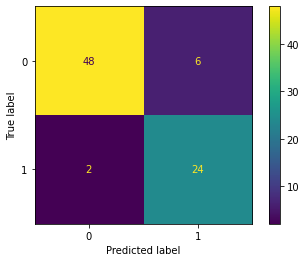

In [10]:
metrics.plot_confusion_matrix(knn, X_test, y_test);

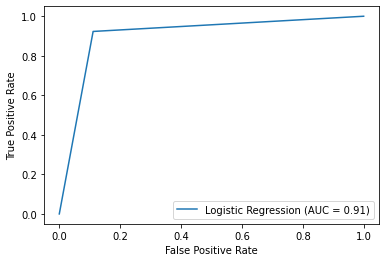

In [11]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot();